In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
#We read the datafile and print the 6 first columns

df = pd.read_csv("laptops.csv", header=None)
df.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016


In [3]:
#The datafile doesnt have headders, so we add them.
headers = ["Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", "Screen_Size_inch", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg", "Price"]
df.columns = headers
df.head(6)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016


## Working with missing values

Steps for working with missing data:

- Identify missing data
- Deal with missing data
- Correct data format

In [4]:
df.replace('?',np.nan, inplace = True)
df.head(5)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [5]:
# Here follows the exercise 2
df[['Screen_Size_inch']] = np.round(df[['Screen_Size_inch']],2)
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [6]:
missing_data = df.isnull()
missing_data.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")


Manufacturer
Manufacturer
False    238
Name: count, dtype: int64

Category
Category
False    238
Name: count, dtype: int64

Screen
Screen
False    238
Name: count, dtype: int64

GPU
GPU
False    238
Name: count, dtype: int64

OS
OS
False    238
Name: count, dtype: int64

CPU_core
CPU_core
False    238
Name: count, dtype: int64

Screen_Size_inch
Screen_Size_inch
False    234
True       4
Name: count, dtype: int64

CPU_frequency
CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
Price
False    238
Name: count, dtype: int64



<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


<b>Replace by mean:</b>

<ul>
    <li>"Screen_Size_inch": 4 missing data, replace them with mean</li>
    <li>"Weight_kg": 5 missing data, replace them with mean</li>
</ul>
    
    

In [8]:
common_screen_size_inch = df["Screen_Size_inch"].astype("float").idxmax(axis=0)
print("Average screen_size_inch:", common_screen_size_inch)

Average screen_size_inch: 34


In [9]:
df["Screen_Size_inch"].replace(np.nan, common_screen_size_inch, inplace=True)

In [10]:
avg_weight_kg = df["Weight_kg"].astype("float").mean(axis=0)
print("Average of Weight in kg:",avg_weight_kg)

Average of Weight in kg: 1.8622317596566522


In [11]:
df["Weight_kg"].replace(np.nan, avg_weight_kg, inplace=True)

In [12]:
#We can see that there is not any NaN:

df.isnull().count()

Manufacturer        238
Category            238
Screen              238
GPU                 238
OS                  238
CPU_core            238
Screen_Size_inch    238
CPU_frequency       238
RAM_GB              238
Storage_GB_SSD      238
Weight_kg           238
Price               238
dtype: int64

In [13]:
df.head(5)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [14]:
df["OS"].value_counts()

OS
1    224
2     14
Name: count, dtype: int64

In [15]:
df.dtypes

Manufacturer         object
Category              int64
Screen               object
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch     object
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_kg            object
Price                 int64
dtype: object

In [16]:
#Here we change the data type

df["Screen_Size_inch"] = df["Screen_Size_inch"].astype("float")
df["Weight_kg"] = df["Weight_kg"].astype("float")

In [17]:
df.dtypes

Manufacturer         object
Category              int64
Screen               object
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_kg           float64
Price                 int64
dtype: object

### Data Standardization


In [18]:
# Data standardization: convert weight from kg to pounds
#df["Weight_kg"] = df["Weight_kg"]*2.205
#df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

# Data standardization: convert screen size from cm to inch
#df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
#df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

In [19]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

In [20]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )

Text(0.5, 1.0, 'Price bins')

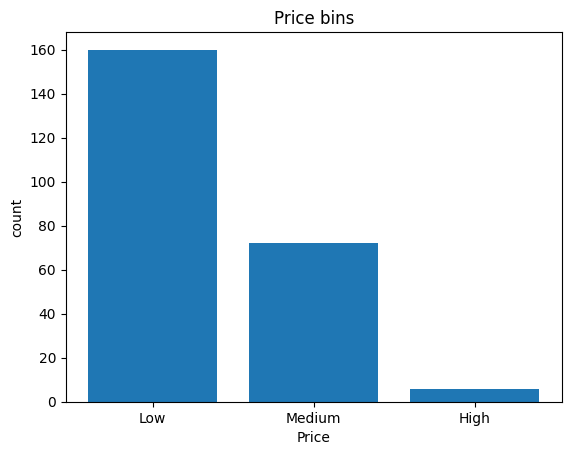

In [21]:
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

In [22]:
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

In [23]:
df

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,35.560,0.551724,8,256,1.60,978,Low,False,True
1,Dell,3,1,1,3,39.624,0.689655,4,256,2.20,634,Low,True,False
2,Dell,3,1,1,7,39.624,0.931034,8,256,2.20,946,Low,True,False
3,Dell,4,2,1,5,33.782,0.551724,8,128,1.22,1244,Low,False,True
4,HP,4,2,1,7,39.624,0.620690,8,256,1.91,837,Low,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,2,1,7,35.560,0.896552,8,256,1.70,1891,Medium,False,True
234,Toshiba,3,2,1,5,33.782,0.827586,8,256,1.20,1950,Medium,True,False
235,Lenovo,4,2,1,5,30.480,0.896552,8,256,1.36,2236,Medium,False,True
236,Lenovo,3,3,1,5,39.624,0.862069,6,256,2.40,883,Low,True,False


(0.0, 3974.15)

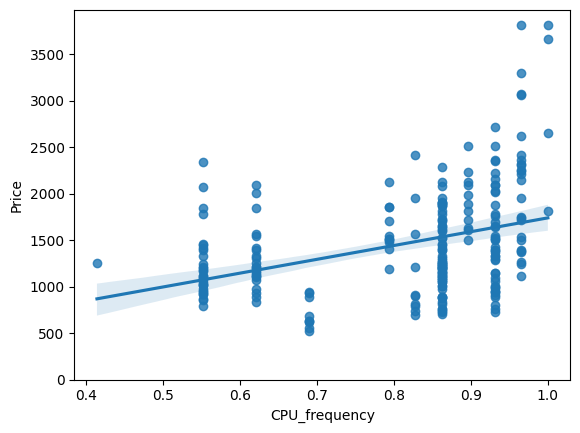

In [24]:
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

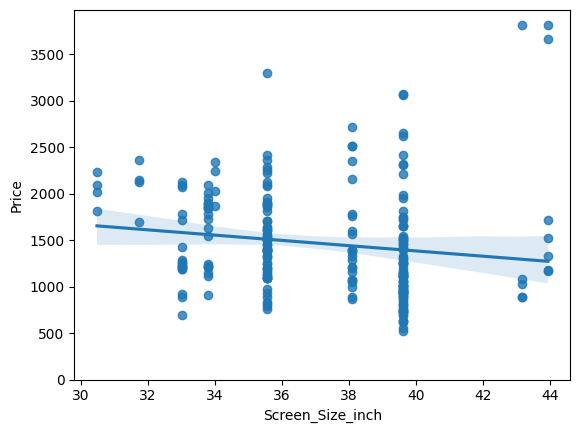

In [25]:
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

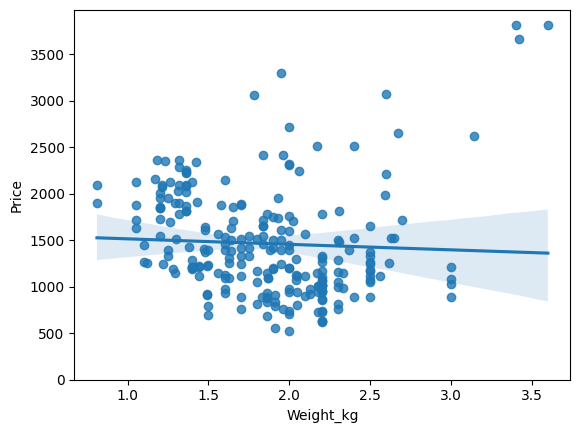

In [26]:
sns.regplot(x="Weight_kg", y="Price", data=df)
plt.ylim(0,)

In [27]:
param = "CPU_frequency"
for param in ["CPU_frequency", "Screen_Size_inch","Weight_kg"]:
    print("Correlation of Price and {} is {} ".format(param, df[[param,"Price"]].corr()))

Correlation of Price and CPU_frequency is                CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000 
Correlation of Price and Screen_Size_inch is                   Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.146627
Price                    -0.146627  1.000000 
Correlation of Price and Weight_kg is            Weight_kg     Price
Weight_kg   1.000000 -0.050312
Price      -0.050312  1.000000 


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

<Axes: xlabel='Category', ylabel='Price'>

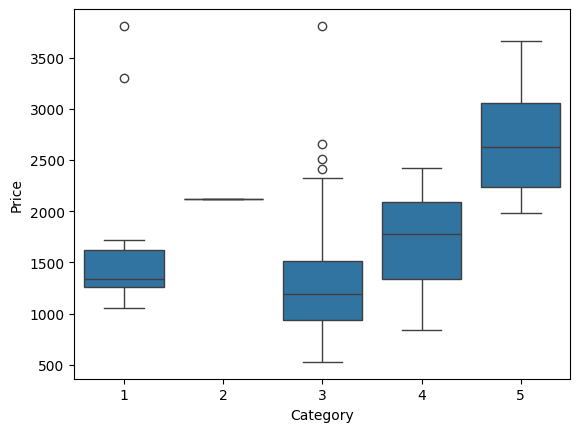

In [28]:
sns.boxplot(x="Category", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

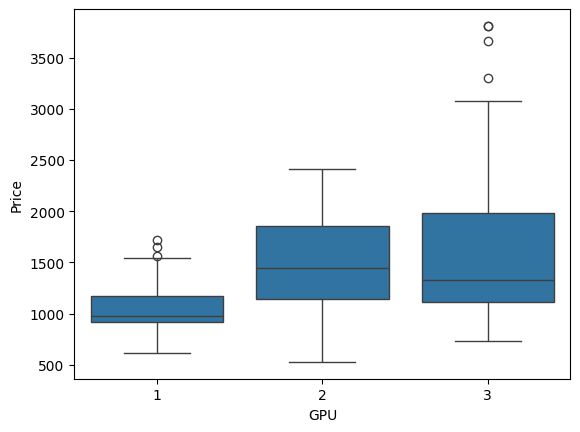

In [29]:
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

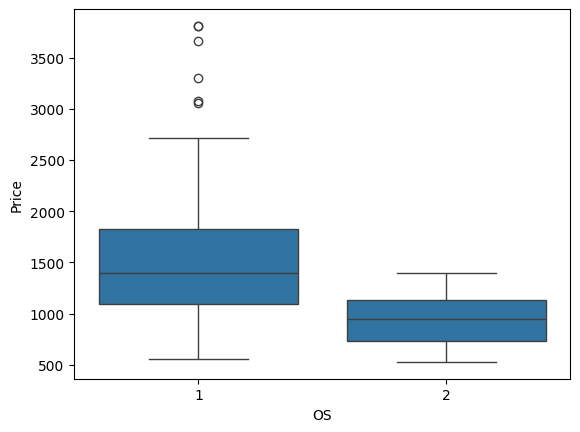

In [30]:
sns.boxplot(x="OS", y="Price", data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

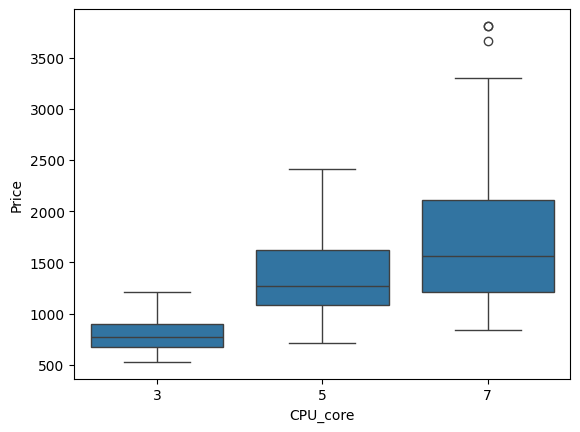

In [31]:
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

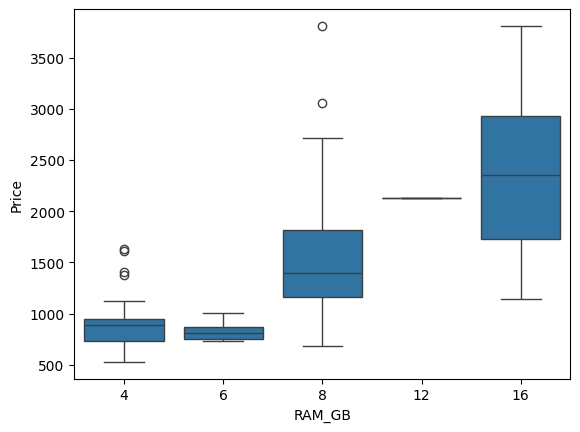

In [32]:
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

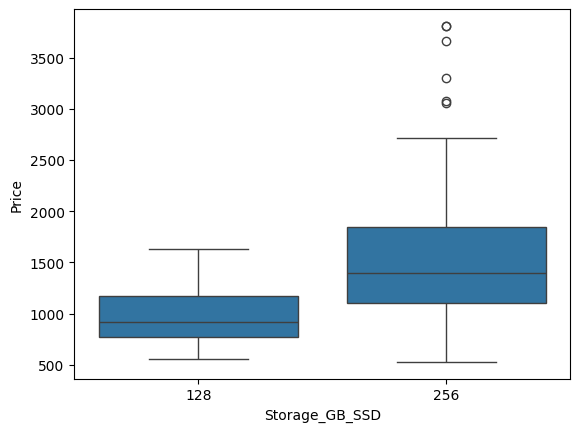

In [33]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

In [34]:
print(df.describe())
print(df.describe(include=['object']))

         Category         GPU          OS    CPU_core  Screen_Size_inch  \
count  238.000000  238.000000  238.000000  238.000000        238.000000   
mean     3.205882    2.151261    1.058824    5.630252         37.214664   
std      0.776533    0.638282    0.235790    1.241787          2.976138   
min      1.000000    1.000000    1.000000    3.000000         30.480000   
25%      3.000000    2.000000    1.000000    5.000000         35.560000   
50%      3.000000    2.000000    1.000000    5.000000         38.100000   
75%      4.000000    3.000000    1.000000    7.000000         39.624000   
max      5.000000    3.000000    2.000000    7.000000         43.942000   

       CPU_frequency      RAM_GB  Storage_GB_SSD   Weight_kg        Price  
count     238.000000  238.000000      238.000000  238.000000   238.000000  
mean        0.813822    7.882353      245.781513    1.862232  1462.344538  
std         0.141860    2.482603       34.765316    0.489090   574.607699  
min         0.413793

# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [35]:
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [36]:
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


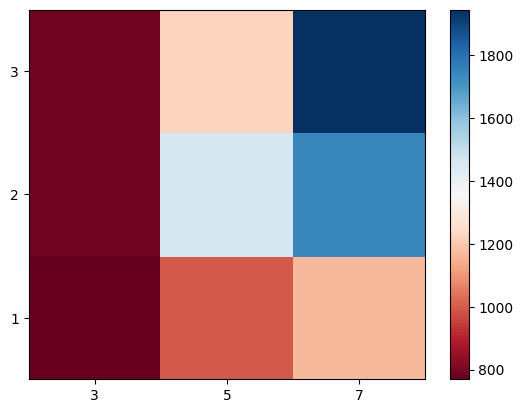

In [37]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [38]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_kg','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857842  with a P-value of P = 3.681560628842986e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.366665558925886  with a P-value of P = 5.5024633507134316e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810297  with a P-value of P = 0.00014898923191724212
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.14662651203930574  with a P-value of P = 0.02367420058126937
Weight_kg
The Pearson Correlation Coefficient for  Weight_kg  is -0.05031225837751544  with a P-value of P = 0.43976938534338944
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551157  with a P-value of P = 7.912950127009089e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827395  with a P-value of P = 0.0005696642559246697
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881427  with a P-

In [39]:
# list the data types for each column
print(df.dtypes)

Manufacturer          object
Category               int64
GPU                    int64
OS                     int64
CPU_core               int64
Screen_Size_inch     float64
CPU_frequency        float64
RAM_GB                 int64
Storage_GB_SSD         int64
Weight_kg            float64
Price                  int64
Price-binned        category
Screen-Full_HD          bool
Screen-IPS_panel        bool
dtype: object


In [51]:
df = pd.DataFrame({
    "Price": [4, 26, 34, 53, 56],
     "Data": [5, 6, 4, 3, 16]
})

dg = df.groupby("Price").mean()

print(dg)

       Data
Price      
4       5.0
26      6.0
34      4.0
53      3.0
56     16.0


In [48]:
lm = linearr

,Price,Weight_kg
0,527,2.00
1,558,1.91
2,616,2.20
3,634,2.20
4,685,1.86
...,...,...
188,3059,1.78
189,3073,2.60
190,3301,1.95
191,3665,3.42


In [47]:
dg["Weight_kg"]

0      2.00
1      1.91
2      2.20
3      2.20
4      1.86
       ... 
188    1.78
189    2.60
190    1.95
191    3.42
192    3.50
Name: Weight_kg, Length: 193, dtype: float64